# "Monte Carlo Methods"
> "In this blog post we will begin to look at Monte Carlo methods and how they can be used. These form the backbone of (essentially) all statistical computer modelling."
- toc: true
- author: Lewis Cole (2020)
- branch: master
- badges: false
- comments: false
- categories: [Monte-Carlo, Statistics, Probability, Computational-Statistics, Theory, Computation]
- hide: false
- search_exclude: false
- image: https://github.com/lewiscoleblog/blog/raw/master/images/Monte-Carlo/MonteCarlo.png

In this blog post we shall be looking at Monte-Carlo methods in general. We will start from first principles and try and build up a somewhat complete picture of what the methods are, why they work and how to use them. With current programming languages and packages the way they are set up it is incredibly easy to throw together a Monte Carlo model. Unfortunately, in the authors experience, most do not have a clear understanding of how any of it works and there are a multitude of sins commited that go completely undetected. Hopefully this blog post will help clarify a few things.

## What is a Monte-Carlo Method?
Going right back to basics, what is a Monte-Carlo method? If you read around (probabilstic/statistical) for any length of time you will see the term bandied around - often to many seemingly unrelated models. The concept of Monte-Carlo can be described as: "Using random simulations to estimate a quantity". This is opposed to a generic "computational" approach where we would rely on deterministic approaches. Often we can think of problems solved with Monte-Carlo being in one of three classes: **integration**, **optimization** and **generating** samples from some probability distribution.

To make things a bit clearer let's look at an example (albeit a very silly one nobody would use in practice!) Let's try and create an estimate of $\pi$ - using a Monte-Carlo approach to solve this is a "classic" interview question for entry level modelling positions. First let's consider the "classic" Riemann integral approach: we can imagine drawing a unit circle on a piece of paper. We know that this will have area: $\pi \times 1^2 = \pi$. We can now imagine creating a square lattice covering this, we can calculate the area of each square easily - by counting the number of squares that are totally inclosed by the circle we can get an estimate of the area. As we decrease the size of the squares we should get a better estimate of $\pi$ and in the limit of the squares tending to zero we get exactly $\pi$. This is exactly the theoretical underpinning of integration. We can create a python code of this :

In [20]:
# Riemann estimate of pi

import numpy as np

# Set number of squares dividing the length of the [-1,1]x[-1,1] square
N = 1000

# Calculate square side length and square area
dx = 2 / N
da = dx**2

# Initiate estimate
pi_est = 0

# Iterate over all possible squares
for x in range(1,N+1):
    for y in range(1,N+1):
        #top left corner distance from origin
        tl = np.sqrt(((x-1)*dx-1)**2+((y-1)*dx-1)**2)
        #top right corner distance from origin
        tr = np.sqrt(((x)*dx-1)**2+((y-1)*dx-1)**2)
        #bottom right corner distance from origin
        br = np.sqrt(((x)*dx-1)**2+((y)*dx-1)**2)
        #bottom right corner distance from origin
        bl = np.sqrt(((x-1)*dx-1)**2+((y)*dx-1)**2)
        
        # If all corners lie within circle the entire
        # square is circumscribed so add area to pi estimate
        if min(tl, tr, br, bl) <= 1:
            pi_est += da

print("Estimate of pi:", pi_est)

Estimate of pi: 3.1493760000072126


This is not the prettiest code and there are ways to make it more efficient, etc. However it gives us an idea of how we can create an estimate of pi. (Of course nobody would do this in practice, there are much better ways of calculating pi!) In contrast a Monte-Carlo approach to creating an estimate of $\pi$ would be as follows: imagine we take the same unit circle located within a square $[-1,1]x[-1,1]$. Instead of thinking about areas we can think about points. If we generate random points within this square we can count the number falling within the circle compared to the total number of points (when we simulate a point and it falls inside the circle we add "4" to the count via the symmetry of the simulation - we could flip the signs of the simulated point and it would still fall within the circle!). We can code this up as follows:

In [21]:
# Monte-Carlo estimate of pi

import numpy as np

# Set number of simulated points
N = 100000

# Initiate counter
count = 0

# Generate random points within [-1,1]x[-1,1] square and test
for i in range(N):
    pt = 2* np.random.random(2) - 1
    
    if np.sqrt(pt[0]**2 + pt[1]**2) < 1:
        count += 4

print("Estimate of pi:", count/N)

Estimate of pi: 3.1432


Again this is a very dumb algorithm that (outside of an interview) nobody would ever use. We can see that we have used "random numbers" as provided by numpy. As it is coded every time we run this code we would end up with a different estimate (for a given number of simulated points) - in some cases this may be useful and in others a problem.

We notice that the procedure in the Monte-Carlo estimate of $\pi$ is fundamentally different to the Riemann approach. Since both algorithms are so dumb we won't comment on which is more efficient. However we can notice that the Monte-Carlo approach is slightly "simpler" and the determistic approach requires slightly more finesse and understanding of the area (i.e. we use the concavity of the circle to say that if all corners of the square are within the circle then the entire square is within the circle) - while this is simple in this scenario it doesn't take much of a leap to realise that in more complicated scenarios we may be in trouble. This is true in general and is one of the selling points of Monte-Carlo methods; it is generally (relatively) easy to implement a method even when there are no analytic solutions to the problem!

We can see now that Monte-Carlo methods rely heavily on random numbers. We now take a brief trip into the world of simulating random numbers.

## Generating Pseudo Random Number Generators
In order for our Monte-Carlo methods to be viable we require an efficient way of generating "random" numbers. The quotes around "random" are intentional for there are great philosophical issues relating to "what constitutes randomness?" For the sake of our purposes we will not go down that dark road, instead we will take the approach: if it looks random then it is random! But what do we mean by looks random?

### Desired Properties
There are a few properties we desire from generated random numbers:
- The samples produced are independent and identically distributed (iid)
- If there is a repeating pattern in our samples it is beyond the scope of our model so we will not notice them (this is called the periodicity)
- There are no correlations between samples
- The samples are not biased
- Ideally we would like the samples to be "repeatable" so that if I run a method multiple times I can get the exact same results (this is more a practical consideration than a theoretical one)
- We would like the random samples to be from a uniform distribution (for reasons that will become clear later)
- It is possible to think of more criteria

To do this we use **pseudo-random number generators** with the preface reminding us that we are not dealing with "true" randomness. For clarity we will define a pseudo-random number generator (herein PRNG) to be a mapping $D$ such that for a given initial condition ("seed") $u_0$ the sequence $u_i = D^i (u_0)$ is such that it reproduces the behaviour of $(V_1,...,V_n)$ a collection of samples from an iid uniform distribution. Where "reproducing" is justified through the use of statistical tests. We can see that the use of a "seed" as an initial value satisfies the "repetable" criteria we noted above.

We will not delve too deeply into the range of statistical tests one can use here as there are many options and to some extent the quality of a PRNG depends on the application. For example cryptographic uses of PRNGs will likely have additional constraints we do not particularly care about for Monte-Carlo. One basic example of a test is the [Kolmogorv-Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) which essentially quantifies the "distance" of the empirical distribution of the PRNG samples and the analytic uniform distribution. Of course this test does not tell us anything about auto-correlation between successive samples, periodicity and so on. A more comprehensive set of tests is the [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests) Another common comprehensive collection of tests can be found in the C library [TestU01](https://en.wikipedia.org/wiki/TestU01).  We will not go into details of these tests but we should be aware that formal testing exists, and a PRNG need not pass every test in order to be useful.

So what are some possibilities for PRNGs? Since we will need to call the mapping multiple times in a Monte-Carlo simulation (e.g. in the $\pi$ example above we used $200,000$ random numbers!) We require something lightweight and quick to call or our runtime will be seriously slow to the point of being unusable. This will always be a trade-off with PRNGs, adding complexity may increase the statistical properties but at the same time it may cost us in computational time. The trick is to find "the sweet spot".

In many textbooks I have seen phrases along the lines of "We can use the computers internal clock to generate random numbers" - but this is a bit misleading. For one generating random numbers this way is by its nature not repeatable. Further it has been shown that the random numbers are not strictly uniform and it becomes very difficult to ensure independence of draws. If we are after only a small number of samples for our program (say we just want to "pause" for a random amount of time) - there is no problem with this approach. However for larger scale Monte-Carlo models where we generate millions of pseudo random numbers these issues mount up.

### Chaotic Systems
Some readers from a mathematics background may be aware of "chaotic systems" whereby a simple determistic map can result in unpredictable and "wild" behaviour. This is certainly a candidate for a PRNG. The issue however is that the random numbers generated tend not to be "uniform" but follow some other distribution, to convert to a uniform will thus cost an addtional transformation (typically expensive). For example the logistic map $X_{n+1} = 4 X_n(X_n -  1)$ is distributed as an arcsine distribution. To convert this to a uniform distribution we need to apply the transform: $Y_n = \frac{1}{2} + \frac{arcsin(2X_n)-1}{\pi}$ Which is expensive. To make matters worse successive samples $(Y_{n+1} Y_n)$ do not appear jointly uniform:

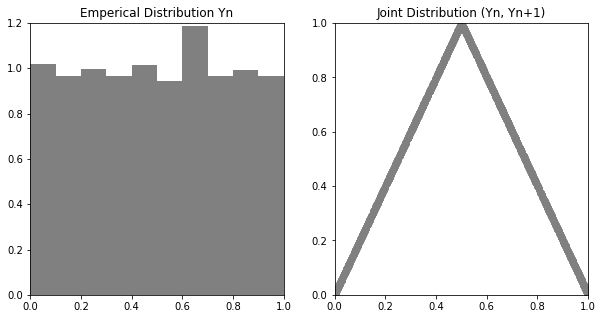

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specify number of random numbers
N = 2500

# Specify starting condition
X0 = 2

# Create array of random numbers
X = np.zeros(N+1)
Y = np.zeros(N+1)

# Specify starting condition
X[0] = 0.254123
Y[0] = 0.5 + np.arcsin(2*X[0]-1) / np.pi


# Loop mapping
for i in range(N):
    X[i+1] = 4*X[i]*(1-X[i])
    Y[i+1] = 0.5+ np.arcsin(2*X[i+1]-1) / np.pi

# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(Y, density=True, color='grey')
ax[0].set_title("Emperical Distribution Yn")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1.2)
ax[1].scatter(Y[0:N], Y[1:N+1], color='grey')
ax[1].set_title("Joint Distribution (Yn, Yn+1)")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.show()

We see that the marginal distribution of $Y_n$ does follow a uniform distribution. However we also see that in fact there is a strong degree of correlation between successive samples which we do not want from a PRNG. We would want the successive points to "fill" the unit square, triples to "fill" the unit cube and so on. Otherwise if we use our Monte-Carlo method to optimise some quantity we may be optimizing to the PRNG not to the problem itself!

Instead we can look at values "further apart" to get better joint behaviour:

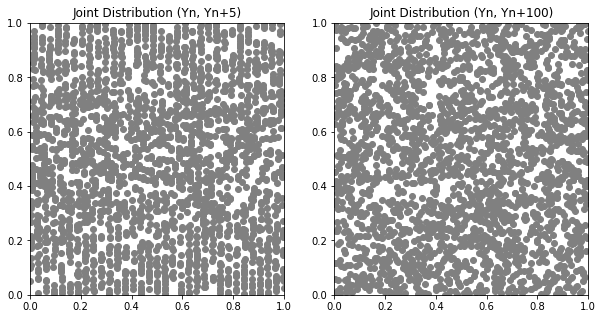

In [23]:
#hide_input
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(Y[0:N-5], Y[6:N+1], color='grey')
ax[0].set_title("Joint Distribution (Yn, Yn+5)")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].scatter(Y[0:N-100], Y[101:N+1], color='grey')
ax[1].set_title("Joint Distribution (Yn, Yn+100)")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.show()


We can see that to ensure a good coverage of the unit square for the joint distribution we need to "throw away" a lot of simulations. This is wasted computation time that will make our programs run very slowly! As such this is not really a viable option (plus regardless of the gap it would fail other statistical uniformity tests.)

### Linear Congruential Generators
So what options do we have? One popular option is a linear congruential generator. The concept behind this is very simple. We use the update scheme:

\begin{align}
x_{n+1} &= (a x_n + c) mod m \\
u_{n+1} &= \frac{x_{n+1}}{m} 
\end{align}

Through careful selection of parameters we can get a sequence of random numbers with period $(m-1)$ these conditions are:
- $c$ and $m$ are co-prime
- Every prime number dividing $m$ also divides $(a-1)$
- $(a-1)$ is divisible by 4 only if $m$ is

It is often convenient to simply take $c=0$ in which case the conditions become:
- $(a^m - 1)$ is a multiple of $m$
- $(a^j - 1)$ is not a multiple of $m$ for any $j=1,2,...,(m-2)$

We can implement this easily as:

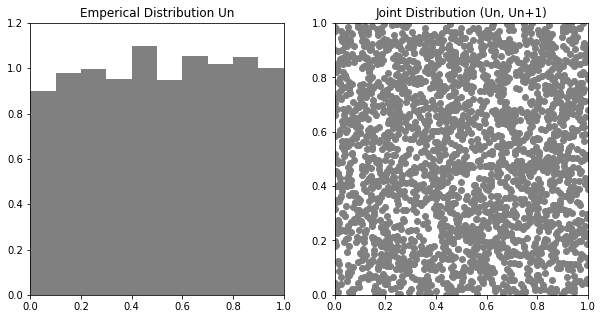

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specify parameters (from L'Ecuyer)
m = 2147483563
a = 40014

# Specify number of random numbers
N = 2500
X = np.zeros(N+1)
U = np.zeros(N+1)

# Specify initial condition (seed)
X[0] = 123
U[0] = X[0] / m

for i in range(N):
    X[i+1] = (a*X[i]) % m
    U[i+1] = X[i+1] / m
    
# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(U, density=True, color='grey')
ax[0].set_title("Emperical Distribution Un")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1.2)
ax[1].scatter(U[0:N], U[1:N+1], color='grey')
ax[1].set_title("Joint Distribution (Un, Un+1)")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.show()

With just a basic "eyeball" test we can see that the joint distribution is better than our last attempt (and runs much more quickly). We also have the added benefit of being able to "look ahead" via:
$ x_{n+k} = a^k x_n mod m$

Typically we would not use an algorithm like this as presented, instead we would take multiple "copies" of this code using different parameters and combine them into a "Multiple Linear Congruential Generator" (MLCG) which has better properties than any one in isolation. It is difficult to see in the example above but a single congruential generator exhibits a "lattice" like structure, if we re-run the code above for $a=6$ and $m=11$ we can see this more clearly:

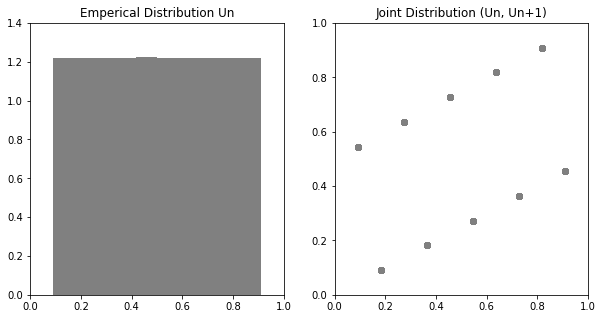

In [25]:
#hide_input
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specify parameters (from L'Ecuyer)
m = 11
a = 6

# Specify number of random numbers
N = 2500
X = np.zeros(N+1)
U = np.zeros(N+1)

# Specify initial condition (seed)
X[0] = 5
U[0] = X[0] / m

for i in range(N):
    X[i+1] = (a*X[i]) % m
    U[i+1] = X[i+1] / m
    
# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(U, density=True, color='grey')
ax[0].set_title("Emperical Distribution Un")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1.4)
ax[1].scatter(U[0:N], U[1:N+1], color='grey')
ax[1].set_title("Joint Distribution (Un, Un+1)")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.show()

We can see the generated joint "random" numbers exist on "lines" - this is not ideal! With larger periodicity like the previous example this is hard to see. The effect of these "lines" becomes less prominent when we combine multiple distinct generators, we do need to be somewhat careful for particularly large models however.

### Mersenne-Twister
Another popular option for a PRNG is the Mersenne Twister (MT). This is used as the default PRNG in many programming environments (including python/numpy - when we call "np.random.random()" or any other random element behind the scenes it is using a Mersenne twister! But before using any pre-canned method it is recommended to try and code a basic version by hand to understand it fully.) The performance is generally more than acceptable for most Monte-Carlo methods. However there is a small "issue" whereby taking multiple sequences each with a different seed (while keeping other parameters the same) will not necessarily lead to independent sequences. However there are methods we can use to overcome this (however this is well out of scope of this blog post, it is just an issue to be aware of). There are many variants on the method that aim to overcome some of the shortfalls but we will restrict ourselves to the "vanilla" version.

We won't get totally bogged down with the details of the MT as it is a bit of a distraction for our purposes. It is a little more involved theoretically than the previous algorithms. It uses linear recurrence and a twisted generalised feedback shift (TGFSR(R)). We create a sequence $x_i$ through a recurrence relation and then apply a matrix mapping $T$ (tempering matrix). The method requires the following parameters (with their definitions):
- w: word size (in number of bits)
- n: degree of recurrence
- m: middle word, an offset used in the recurrence relation defining the series x, 1 ≤ m < n
- r: separation point of one word, or the number of bits of the lower bitmask, 0 ≤ r ≤ w - 1
- a: coefficients of the rational normal form twist matrix
- b, c: TGFSR(R) tempering bitmasks
- s, t: TGFSR(R) tempering bit shifts
- u, d, l: additional Mersenne Twister tempering bit shifts/masks

With parameters satisfying that $2^{nw-r} -1$ is Mersenne prime (hence the name). The method produces a sequence of integers in the range $[0, 2^w -1]$. The recurrence relation for the sequence $x_i$ is:

$$ x_{k+n} = x_{k+m} \oplus (( x_k^u \mathbin{\|} x_{k+1}^l )A) $$

Where $\oplus$ represents a bit-wise xor, $x_k^u$ represents the upper $w-r$ bits of $x_k$ and $x_{k+1}^l$ the lower $r$ bits of $x_{k+1}$. The Twist mapping $A$ is such that:

$$xA={\begin{cases}{x}\gg 1&x_{0}=0\\({x}\gg 1)\oplus {\boldsymbol {a}}&x_{0}=1\end{cases}}$$

Where $x_0$ is the lowest order bit of $x$. we now apply the tempering transform through the creation of temporary intermediate value $y$ and define the output of the algorithm $z$ via:
\begin{align}
y &= x \oplus ((x \gg u) \& d) \\
y &= y \oplus ((y \ll s) \& b) \\
y &= y \oplus ((y \ll t) \& c) \\
z &= y \oplus (y \gg l)
\end{align}
We have denoted bitwise logical and as $\&$ and bitwise left and right shifts as $\ll$ and $\gg$ respectively.

We now implement a basic version of this in python and plot the results:

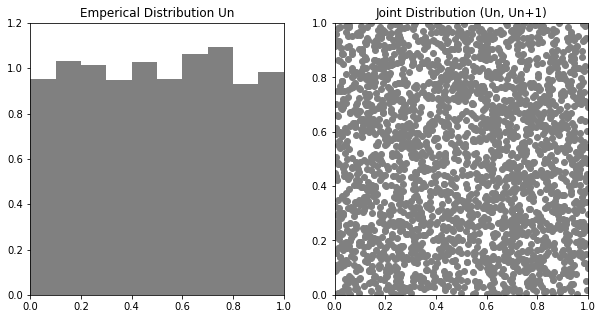

In [26]:
# Basic Implementation of the Mersenne Twister MT19937 algorithm

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specify parameters for MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253


# Store state of the generator in array MT
MT = [0 for i in range(n)]
index = n+1
lower_mask = 0xFFFFFFFF 
upper_mask = 0x00000000 


# Initialize the generator via the seed
# Default seed matches C++ implementation
def mt_seed(seed=5489):
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


# Extract a tempered value based on MT[index]
# calling twist() every n numbers
def generate_number():
    global index
    if index >= n:
        twist()
        index = 0

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << t) & c)
    y = y ^ ((y << s) & b)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# Generate the next n values from the series x_i
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA

# Generate random numbers
N = 2500
U = np.zeros(N)

# Set seed
mt_seed()

for i in range(N):
    U[i] = generate_number() / 2**w

# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(U, density=True, color='grey')
ax[0].set_title("Emperical Distribution Un")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1.2)
ax[1].scatter(U[0:N-1], U[1:N], color='grey')
ax[1].set_title("Joint Distribution (Un, Un+1)")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
plt.show()

Which we can see passes our (very crude) eyeball test for random number generation.

It is also worth mentioning that it is possible to combine the Mersenne twister with the MLCG to again try and get the "best of both worlds". The [KISS algorithm](https://en.wikipedia.org/wiki/KISS_(algorithm)) combines an MLCG with a bit-shifting PRNG (somewhat similar to the Mersenne twister).

There are other options that we have not covered here. For example the potential use of cellular automata to create randomness (you can read my blog post on cellular automata [here!](https://lewiscoleblog.com/cellular-automata)) There are also PRNGs being used for cryptography which we have not covered. There has also been research into leveraging quantum computing to generate random numbers but the field is still relatively fresh and (as far as I know) not particularly close to being widely adopted yet.

The bright side to all of this is most programming languages have modules with PRNGs ready to go! Most of the time these will be more than sufficient for Monte-Carlo based modelling, so we do not require an intimate knowledge of how to create them from scratch. There are some exceptions worth remembering however: if running the PRNG multiple times "independently" with differeing seeds keep in mind the sequences might not be random, if you're making a truly goliath model be aware on periodicity! And if we want a model to run super-quickly it might be worth coding up a very simple PRNG with less than ideal statistical performance, in some cases run-time is the most important thing.

## Generating Samples Statistical Distributions
In our (rather contrived) Monte-Carlo $\pi$ estimator we relied on uniform random variates. In general we will want to simulate from more general distributions. For example suppose we wanted to generate representative heights of people within a population, we know that the normal/Gaussian distribution would be a good choice - how can we do this? We could come up with a whole new random number generator that spits out normally distributed samples instead, however this isn't a good general approach to the problem - what if instead we required samples from a Beta distribution instead? In some instances the "specialist random number generator" approach can be useful where speed is of the utmost concern, however for at least 99% of Monte-Carlo methods we encounter this is not required.

### Generalized Inverse Method
Instead what we tend to do is look for ways of "converting" the uniform variates (herein we will denote these as $(u_1, u_2, ... )$ with $u_i \sim U[0,1]$ iid) into the distribution of our desire. By far the most common way of doing this is to use the "Generalized Inverse Method". Suppose we want to simulate variable $X$ with some distribution. We denote it's cumulative function as:
$$F(x) = \mathbb{P}( X \leq x) $$

We denote the generalized inverse of $F$ as:
$$ F^{-1}(u) = inf \{ x : F(x) \geq u \} $$

This looks like a rather complicated definition but it is infact rather simple. In the case of $X$ being a continuous variable the generalized inverse function is identical to our normal notion of an "inverse function". The complication with infima arises when we consider discrete variables, we want to define the generalized inverse on the entire line $[0,1]$ not just the discrete points - we can just imagine drawing "straight lines" between the discrete points on the graph. We then have the probability integral transform lemma:

>For $U \sim U[0,1]$ and $X \sim F$ then the random variable $F^{-1}(U) \sim F$

This means if we can define the cumulative function for a distribution and invert it we can simulate from the distribution. This is really powerful since it allows us to simulate from essentially any distribution. Say we have a bunch of data and we want to sample from its empirical distribution we can even do this by defining the cumulative function. It is simple fo prove the probability integral transform lemma:

>For all $u \in [0,1]$ and $x \in F^{-1}([0,1])$ we have:
>
> $F(F^{-1}(u)) \geq u$ and $F^{-1}(F(x)) \leq x$ 
>
> Therefore: 
>
> $\{(u,x) : F^{-1}(u) \leq x \} = \{(u,x) : F(x) \geq u\}$ 
>
> And so:
>
> $\mathbb{P}(F^{-1}(U) \leq x) = \mathbb{P}(U \leq F(x)) = F(x)$ 
> $$\square$$

Let's see how we can use this method with a simple example. If we have $X \sim Exp(\lambda)$ (an exponential distribution with parameter $\lambda$) we have that the cumulative function is:
$$F(x) = 1 - e^{-\lambda x}$$

By inverting this function with some basic algebra we get:
$$F^{-1}(u) = \frac{-1}{\lambda} ln(1-u) $$

We can note that $U \sim (1-U)$ and so we have:
$$ \frac{-1}{\lambda} ln(U) \sim F $$

Let's look at this in action:

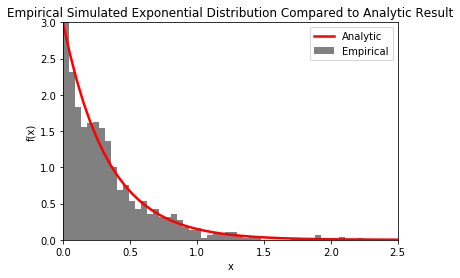

In [27]:
# Sampling from an Exponential(lambda) distribution

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set number of simultations (N) and lambda (lam)
N = 1000
lam = 3

# Sample uniform random variates
U = np.random.random(N)

# Apply probability integral transform
X = - np.log(U) / lam

# Create Array for analytic result
x_a = np.linspace(0, 2.5, num=50)
fx_a = lam * np.exp(-lam * x_a)

# Plot histogram of samples
plt.hist(X, density=True, bins=50, label='Empirical', color='grey')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.xlim(0,2.5)
plt.ylim(0,3)
plt.plot(x_a, fx_a, label='Analytic', color='red', linewidth=2.5)
plt.legend()
plt.title("Empirical Simulated Exponential Distribution Compared to Analytic Result")
plt.show()

We can see that this sampling method produced empirical results very close to the true analytic solution! While we may be able to find more efficient sampling schemes in some instances we now have a completely general purpose tool for simulating from arbitrary distributions "exactly" (in the sense that we are limited only by computational runtime not by the method itself).

This aren't all as rosy as they seem however! In some instances the cumulative function may be rather "messy" - even for something as "simple" as a Gaussian(0,1) distribution we have:
$$F(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{\frac{-z^2}{2}} dz$$

Good luck trying to invert that function analytically! We can however relax the need for "exact" sampling and apply approximation procedures. For example from Abramowitz and Stegun we have:
$$ F^{-1}(x) = \sqrt{ln(x^{-2})} - \frac{2.30753 + 0.27061\sqrt{ln(x^{-2})}}{1 + 0.99229\sqrt{ln(x^{-2})} + 0.044841 ln(x^{-2})} $$

Where we have an absolute error of the order $10^{-8}$ - which may or may not be acceptable. We can find approximations to arbitrary levels of accuracy should we wish.

Thankfully a lot of the time the hard work has been done for us however and "inverse CDF" functions exist in most stats packages and modules (e.g. scipy.stats) and these are by far the most common way of simulating from generic distributions. It was useful for us to do this ourselves by hand however for the cases where this is not possible (e.g. fit an empirical curve to some data and we don't want to use a parameteric distribution and lose any detail - or we want some particularly obscure parameteric distribution that has not been included in the package!). We also need to keep in mind although these inverse CDFs exist, and they've likely be coded optimally by very smart folks, they still might be slow in some situations. Part of the skill that seperates a great Monte-Carlo practitioner from a merely good one is to know how/when to use alternate methods to achieve better performance for a given objective (typically the tradeoff between statistical accuracy and run-time).

For completeness let's apply the generalized inverse transform using "scipy.stats" (here the ".ppf" functions are the inverse CDFs). Repeating the process above with pre-canned functions:

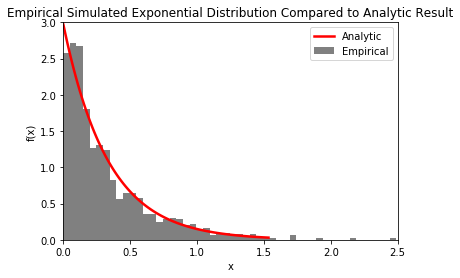

In [4]:
# Sampling from an Exponential(lambda) distribution
# Using Scipy stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
%matplotlib inline

# Set number of simultations (N) and lambda (lam)
N = 1000
lam = 3

# Sample uniform random variates
U = np.random.random(N)

# Apply probability integral transform
X = expon.ppf(U, scale=1/lam)

# Create Array for analytic result
x_a = np.linspace(expon.ppf(0.01, scale=1/lam), expon.ppf(0.99, scale=1/lam), 100)
fx_a = expon.pdf(x_a, scale=1/lam)

# Plot histogram of samples
plt.hist(X, density=True, bins=50, label='Empirical', color='grey')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.xlim(0,2.5)
plt.ylim(0,3)
plt.plot(x_a, fx_a, label='Analytic', color='red', linewidth=2.5)
plt.legend()
plt.title("Empirical Simulated Exponential Distribution Compared to Analytic Result")
plt.show()

We can see upto noise the results are the same as our "hand-coded" example. Stats packages also sometimes include a "simulate from" function that replaces the entire need to inverse transform, however we'll see later that this is rarely convenient for larger scale more complicated models. For completeness we could simulate directly using scipy.stats with:

In [6]:
# Sampling from an Exponential(lambda) distribution
# Using Scipy stats

import numpy as np
from scipy.stats import expon

# Set number of simultations (N) and lambda (lam)
N = 1000
lam = 3

X = expon.rvs(scale=1/lam, size=N)

We will not reproduce the plot again, but this approach is equivalent to that above.

### Relationships Between Distributions
However in a lot of cases we can rely on relationships between distributions to help us (think back to stats class where you thought you'd never use this stuff!) For example if $X_i \sim Exp(1)$ iid then we can define $Y \sim Gamma(\alpha, \beta)$ via:
$$ Y = \beta \sum_{i=1}^{\alpha} X_i$$

Along with many other relations. We can then avoid having to invert the CDF:
$$F(x) = \frac {1}{\Gamma (\alpha )}\gamma (\alpha ,\beta x) $$

Which is not particuarly easy to do. There is a skill in knowing when/how to use these sorts of transformations. Lots of times the difference in execution time is negligble so it is better to use the standard inversion method on the CDF as it makes the code more transparent. In others timing matters and with the right transformation there can be serious time savings available.

One transform method for generating standard Gaussian variates is the Box-Muller technique. It relies on a polar co-ordinate representation $(r, \theta)$. If $(X_1, X_2)$ are Gaussian(0,1) then we can write:
$$r^2 = X_1^2 + X_2^2 \sim \chi_2^2 = Exp(\frac{1}{2})$$

We can then use $U_1, U_2 \sim U[0,1]$ iid to represent $(X_1, X_2)$ as:
\begin{align}
X_1 &= \sqrt{-2lnU_1}cos(2\pi U_2) \\
X_2 &= \sqrt{-2lnU_1}sin(2\pi U_2)
\end{align}

This algorithm isn't the fastest performing algorithm one can find however, the $sin(.)$ and $cos(.)$ function calls are computationally quite expensive.

Relying on the relationships between distributions can be problematic. For one thing it might not be possible to construct a nice neat relationship - or if we can construct a relationship it may have strict conditions that means any conversion becomes inefficient.


### Acceptance-Rejection Methods
Another class of method we can use are the acceptance-rejection methods. Again this relies on taking (pseudo-random) uniform variates as a starting point (you can now see why we would want a PRNG to be efficient at generating uniform variates by now!) The general concept is to "look" at each uniform pseudo-random number and decide whether we believe this could have been generated by the distribution we wish to sample from (and accept it) or not (and reject it).

The main theoretical backbone behind these methods is:

**The Fundatmental Theorem of Simulation**: 

Simulating variates with density $f(x)$:
$$ X \sim f(x) $$

Is equivalent to simulating:
$$ (X, U) \sim U \{ (x,u) : 0 < u < f(x) \} $$

It is not immediately clear why  this is useful at this stage, but it is quite prophetic and it underlies many simulation algorithms. To see why lets note:
\begin{align}
f(x) &= \int_0^{f(x)} du \\
\mathbb{P}(X \leq x) &= \int_{\infty}^{x} f(y) dy
\end{align}

These are essentially just definitions, but they help us enormously in out simulation problem. For example let's suppose we have some arbitrary density $f(.)$ such that:
\begin{align}
\int_a^b f(x) dx &= 1 \\
sup_x \{ f(x) \} &\leq M
\end{align}

Then we can simulate from $f(.)$ by generating: $(Y, U)$ such that $Y \sim U[a,b]$ and $U|Y=y \sim U[0,M]$ we accept simulations $u$ if $(0 < u < f(y))$ otherwise we reject the simulations. This works because:
\begin{align}
\mathbb{P}(X \leq x) &= \mathbb{P}(Y \leq x | U < f(Y)) \\
                     &= \frac{\int_a^x \int_0^{f(y)} du dy}{\int_a^b \int_0^{f(y)} du dy} \\
                     &= \int_a^x f(y) dy
\end{align}

This is all a bit notation heavy so let's look at a specific example now. We shall generate from a Beta distribution. This has density function:
$$ f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)} $$

Where $B$ is the Beta function defined:
$$ B(\alpha ,\beta )={\frac {\Gamma (\alpha )\Gamma (\beta )}{\Gamma (\alpha +\beta )}} $$

The Gamma function $\Gamma$ being:
$$ \Gamma (z)=\int _{0}^{\infty }x^{z-1}e^{-x}\,dx $$

Through differentiation we find the maximum value attained by this function is:
$$ max_x (f(x)) = \frac{\left(\frac{\alpha-1}{\alpha+\beta-2}\right)^{\alpha-1}\left(1-\frac{\alpha-1}{\alpha+\beta-2}\right)^{\beta-1}} {B(\alpha,\beta)} = M $$

Assuming $\alpha + \beta > 2$

We can use this to sample from the Beta distribution using acceptance/rejection:

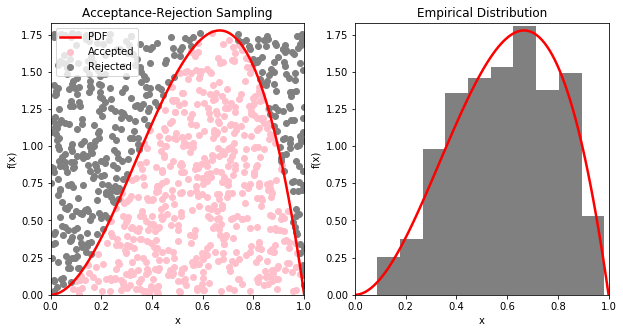

In [28]:
# Sampling from a beta distribution using acceptance/rejection

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta
%matplotlib inline

# Define the beta distribution parameters
ap = 3
bt = 2

# Define the beta pdf
def beta_pdf(x, a=ap, b=bt):
    return x**(a-1)*(1-x)**(b-1) / beta(a,b)

# Define Maximum attained value
x_max = (ap - 1) / (ap+bt - 2)
M = beta_pdf(x_max)

# Define number of samples
N = 1000

# Create samples
Y = np.random.random(N)
U = np.random.random(N)*M

mask_acc = U < beta_pdf(Y)
mask_rej = U > beta_pdf(Y)

# Accepted Samples
Y_acc = Y[mask_acc]
U_acc = U[mask_acc]

# Rejected Samples
Y_rej = Y[mask_rej]
U_rej = U[mask_rej]

# Create analytic pdf plots
X = np.linspace(0,1,100)
PDF = beta_pdf(X)

# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(Y_acc, U_acc, color='pink', label='Accepted')
ax[0].scatter(Y_rej, U_rej, color='grey', label='Rejected')
ax[0].plot(X, PDF, color='red', linewidth=2.5, label='PDF')
ax[0].set_title('Acceptance-Rejection Sampling')
ax[0].set_ylabel('f(x)')
ax[0].set_xlabel('x')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,M+0.05)
ax[0].legend()
ax[1].hist(Y_acc, density=True, color='grey')
ax[1].plot(X, PDF, linewidth=2.5, color='red')
ax[1].set_title("Empirical Distribution")
ax[1].set_ylabel('f(x)')
ax[1].set_xlabel('x')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,M+0.05)
plt.show()

In the left-hand image above we get a graphical representation of what is actually happening with the acceptance/rejection procedure. On the right we see that the resulting samples are indeed distributed as we would like. By construction we know that the acceptance rate should be $\frac{1}{M}$ - we can check this easily:

In [29]:
print("Theoretical Acceptance Rate:", 1/M)
print("Empirical Acceptance Rate:", Y_acc.shape[0] / N )

Theoretical Acceptance Rate: 0.5624999999999999
Empirical Acceptance Rate: 0.568


So far this method is fairly cute but not entirely useful. The main issue is we have restricted ourselves to a finite support (in the beta example $x\in [0,1]$) For many applications we want an infinite support. Another issue is we have assumed that there is an achieved maximum in the distribution function, in some distributions we want to sample from this is not the case. Thankfully we can modify this method slightly to allow for this.

If we modify the fundamental theorem of simulation to:
$$ (Y, U) \sim U \{ (y,u) : 0 < u < m(y) \} $$

Now instead of censoring on the distribution function itself we censor according to some other function with: $m(x) > f(x)$ everywhere. We then express $m(.)$ in the form: $m(x) = M g(x)$, such that $\int g(x) = 1$ and $g(.)$ is itself a distribution function. If we simulate $Y \sim g$ and $U | Y=y \sim U(0, Mg(y))$ then by the constraint $m(x) > f(x)$ the procedure works, why?
\begin{align}
\mathbb{P}(X \in A) &= \mathbb{P}(Y \in A | U < f(Y)) \\
                     &= \frac{\int_A \int_0^{f(y)} \frac{du}{Mg(y)} g(y) dy} {\int_D \int_0^{f(y)} \frac{du}{Mg(y)} g(y) dy} \\
                     &= \int_A f(y) dy
\end{align}

Where $A$ is any subset of the entire domain of $f$ ($D$).

There are two big consequences to this adapted method: firstly we do not actually need to know $f(.)$ exactly, we only need to know it up to a constant multiplier (i.e. we could replace $f(.)$ with $\hat{f} \propto f$) - this is particularly useful for Bayesian modelling where we have the mantra:
$$ Posterior \, \propto Prior \times Likelihood$$
And so we don't always want to integrate out the posterior. Secondly it does not matter what the distribution function $g(.)$ we choose, the method will still work. The only constraint is that it needs to have a domain that is a super-set of the domain of $f(.)$.

However as before we do have that the acceptance probability is bounded by $\frac{1}{M}$ - therefore the "better match" the function $g(.)$ is to $f(.)$ the better the algorithm will perform. The "wasted" samples will exist between the two plots generated by $g(.)$ and $f(.)$ respectively.

Let's consider an example, suppose we find that we want to sample from:
$$f(x) \propto cos^{2}(x) exp(-x^2) $$

Where we ignore the normalizing constant (which will not have the prettiest form) and x can take any value on the real line.

We know that $cos^2(x)$ takes values in $[0,1]$ and so we know that $f(.)$ is bounded by:
$$g(x) \propto exp(-x^2)$$

We should now find $M$ which is the maximum of the ratio of $g(.)$ to $f(.)$ which is:
$$M = max_x \frac{f(x)}{g(x)} = max_x cos^2(x) = 1 $$

So we can use the standard Gaussian as our proposal distribution in our acceptance rejection algorithm.

We can plot these functions using matplotlib:

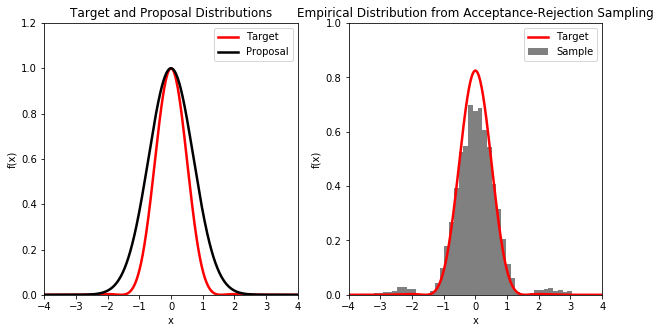

In [25]:
# Plotting the target function and proposal function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

def f(x):
    return np.cos(x)**2 * np.exp(-x**2)

def g(x):
    return np.exp(-x**2)

# Generate N samples
N = 10000
U = np.random.random(N)
V = np.random.random(N)
Y = norm.ppf(V)
M = 1

mask_acc = U < f(Y) / (M *g(Y))
mask_rej = U > f(Y) / (M *g(Y))

# Accepted Samples
Y_acc = Y[mask_acc]
U_acc = U[mask_acc]

# Rejected Samples
Y_rej = Y[mask_rej]
U_rej = U[mask_rej]


# Create plots for analytic functions
X = np.linspace(-4, 4, 1000)
PDF = f(X)
g_x = g(X)

# Estimate Normalizing constant
dx = X[1] - X[0]
const = PDF * dx
const = const.sum()

# Create Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(X, PDF, color='red', linewidth=2.5, label='Target')
ax[0].plot(X, g_x, color='black', linewidth=2.5, label='Proposal')
ax[0].set_title('Target and Proposal Distributions')
ax[0].set_ylabel('f(x)')
ax[0].set_xlabel('x')
ax[0].set_xlim(-4,4)
ax[0].set_ylim(0,1.2)
ax[0].legend()
ax[1].hist(Y_acc, density=True, color='grey', bins=50, label='Sample')
ax[1].plot(X, PDF/const, linewidth=2.5, color='red', label='Target')
ax[1].set_title("Empirical Distribution from Acceptance-Rejection Sampling")
ax[1].set_ylabel('f(x)')
ax[1].set_xlabel('x')
ax[1].set_xlim(-4,4)
ax[1].set_ylim(0,1)
ax[1].legend()
plt.show()

Which we can see performs similarly to the previous case with finite domain.

We can often improve the pure acceptance-rejection method by adding a lower bound function ($g_L$) such that:
$$ g_L(x) \leq f(x) \leq Mg_M(x) $$

We then modify our algorithm by adding an addition step. In pseudo-code we have:
1. Sample $X \sim g_M$ and $U \sim U[0,1]$
2. Accept $X$ if $U \leq \frac{g_L(X)}{Mg_M(X)}$
3. Else except $X$ if $U \leq \frac{f(X)}{Mg_M(X)}$

This can offer improvements when the function $f(.)$ is computationally expensive to call. This procedure can reduce the number of calls potentially by a factor: $\frac{1}{M}\int g_L(x) dx$. This is sometimes called the squeeze method. (Note: $g_L$ need not be a density function). We can also improve the efficiency further by taking piece-wise linear functions as our upper and lower bound functions, these are easy to specify and quick to call. In some instances it is easy to create such bounds (but in others this might not be possible).

### Adaptive-Rejection-Sampling (ARS)
One extension to the acceptance-rejection sampling is adaptive rejection sampling (ARS) from Gilks and Wild (1992) - like many methods in computational statistics it is often possible to craft more efficient schemes for a specific purpose, however ARS does provide reasonable efficiency for a wide variety of sampling problems.

For ARS to work we require that the distribution function $f(.)$ is log-concave. That is:
$$ \frac{\partial^2}{\partial x^2} ln(f(x)) < 0$$

This may seem like a highly restrictive constraint but it actually turns out that very often a distribution function will have this property, even in seemingly complicated distributions. So this method is in fact fairly flexible and tends to offer some improvement over "vanilla" acceptance-rejection.

The main idea of ARS is to use the "piecewise linear" bounding functions and the "squeeze method" in acceptance-rejection above but applied to the log transform of the pdf rather than the pdf itself. We see that we require log-concavity since we can say with certainty that any chord (straight line connecting 2 points on the curve) will always be below the curve, thus it is easy to construct bounding functions. We will present how to do this construction below:

We take the notation: $h(x) = ln(f(x))$ for convenience. We specify $n$ points along the domain of $f(x)$. We denote these by $S_n= \{x_1, x_2, ..., x_n \}$. We define a line segment $L_{i,i+1}$ as being the straight line between points $(x_i, h(x_i))$ and $(x_{i+1}, h(x_{i+1}))$. By log concavity for all $x \in [x_i, x_{i+1}]$ we have: $L_{i,i+1}(x) < h(x)$. We denote this  $\underline{h_n}(x) = L_{i,i+1}(x)$ for $x \in [x_i, x_{i+1}]$ - piecewise linear. Through construction we also have that on the same interval: $min(L_{i-1,i}(x),L_{i+1,i+2}(x)) > h(x)$ - so we have an upperbounding function: $\overline{h_n}(x) = min(L_{i-1,i}(x),L_{i+1,i+2}(x))$. With these functions we can apply the squeeze method, by taking: $\underline{f_n}(x) = exp(\underline{h_n}(x) )$ and $  \overline{f_n}(x) = exp(\overline{h_n}(x))$. Since we will have: $\underline{f_n}(x) < f(x) < \overline{f_n}(x) $ for the entire domain of $f(x)$. All that remains is to normalize $\overline{f_n}(x)$ such that: $\overline{f_n}(x) = \omega_n g_n(x)$ with $\int g_n(x) dx = 1$ (i.e. $g(.)$ is a true pdf). 

Since calls to $f(.)$ may be (very) expensive we want to limit the number of times we evaluate it, therefore whenever we create a new sample we add it to the set $S_n$ (so it becomes $S_{n+1}$). As the sampler runs the piecewise linear functions created become increasingly close to the target denity, this can lead to large improvements in efficiency when generating large numbers of samples from a complicated desnity function. Of course for large $n$ storing $S_n$ and related linear functions may become an issue in terms of memory, the rest of our model may also require memory storage and we will always aim to keep as much in cache/RAM as possible to ensure efficient running of the code. As such we may not want to store every sample we create, perhaps we would apply a rule that only if the new sample is a certain distance away from the other points does it get stored in $S_n$  or we could keep the number of nodes fixed and simply "replace" the "less useful" points as we find "more useful" points by sampling - again this is the part of Monte-Carlo that is as much art as it is science.

In pseudo-code we can write down the ARS procedure as:
0. Initialize $n$ and $S_n = \{ x_1, x_2, ... , x_n \} $
1. Sample $X \sim g_n$ and $U \sim U[0,1]$
2. If: $U \leq \frac{\underline{f_n}(X)}{\omega_n g_n(X)}$ then accept sample $X$
3. Else if: $U \leq \frac{f(X)}{\omega_n g_n(X)}$ then accept sample $X$
4. If: $X$ is accepted append: $S_n \to S_n \cup \{X\} = S_{n+1}$
5. Repeat steps $1 \to 4$ for desired number of samples

We will not code this up as an example here since it gets a bit fiddly and will take up a reasonable amount of space. (I may come back and edit this later if I can create a very simple easy to read code). ARS is built into many stats packages (e.g. R has a pre-canned ARS sampler). In Python we have the (unfortunately named) package [ARSpy](https://arspy.readthedocs.io/en/latest/) which we can use. In doing a quick GitHub search I also found a clean implementation from Alberto Lumbreras: [here!](https://github.com/alumbreras/ARS) which the interested reader can investigate further should they wish.

Although log-concavity is not a "rare" property for a distribution function, neither is it completely general. As such there have been attempts to modify the method to drop this requiirement, however details of these is beyond the scope of this blog post. The ARS method is particularly useful in Markov-Chain Monte-Carlo which is something we have not yet touched on but will later.

This concludes our section on sampling from generic univariate distributions. We have seen a few different options for converting our PRNG samples into arbitrary distributions. The methods presented here are in essence the "building blocks" and represent some of the key concepts, they are blunt tools that are fairly universal in their application. Many more methods exist that offer improvements in computational cost but they are often very specific in nature (for example to simulate exact normal variates very quickly).

## Conclusion
I this blog post we have looked at the theoretical underpinnings of some basic Monte-Carlo methods that can be used to sample from arbitrary probability distributions. We first started by looking at a motivating example to compare a "traditional" mathematical approach to computational approximation and then compared this to a stochastic Monte-Carlo option.

Knowing we would need to sample uniform variates we then looked at various options for pseudo-random number generation and found two main "types": the multiple-linear-congruential-generator and the Mersenne-twister. We saw that for the purposes of the vast majority of Monte-Carlo simulations these offer reasonable statistical properties and aren't too inefficient.

Following on we saw various methods that we could use in order to "convert" the pseudo-random uniform variates generated into samples from a generic distribution. One main class being the "generalized-inverse" method (by far the most popular), which works however in some more complicated cases specifying the CDF is a challenge, let alone inverting it. Moreover the cost of calling an inverse CDF may be prohbitive. To overcome this we can rely of relationships between distributions, we can use inverse transform to generate "easy" distributions (e.g. exponential) and then apply functions to these samples to create the more complicated distributions we require. As an alternative we also saw "acceptance-rejection" schemes. These methods are useful and fairly general, however efficiency is highly dependent on the rejection rate and finding good proposal distributions (or creating them piecewise linearly) is often challenging.

We also saw some of the considerations at play when designing a Monte-Carlo model relating to the tradeoffs between code efficiency, statistical accuracy and (often overlooked) code transparency.

___
## References
In preparing this blog post I consulted the following texts:
- Monte-Carlo Statistical Methods - CP Robert & G Casella
- Monte-Carlo Methods in Financial Engineering - P Glasserman
- Non-Uniform Random Variate Generation - L Devroye

And relied on lecture notes from Warwick University course "Monte Carlo Methods" (c.2010)